## <span style="color:brown">*Capstone project: Geolocalisation -  Notebook 1. Data preprocessing*</span>

### <span style="color:brown">*0. Load packages and data*</span>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

#df = pd.read_table('data/Geo_data.GT.h.txt', sep="\t", header=0)

### <span style="color:brown">*1. Formatting the data*</span>

In [14]:
#print(df.shape)
#df.head()

#### <span style="color:brown">*1.1 Remove last column as it has no information*</span>

In [3]:
df = df.drop(df.columns[434], axis=1) # Remove last column as it has no information
dft = df.T # transpose data.frame

#### <span style="color:brown">*1.2 Save data object with pickle*</span>

In [4]:
#dft.to_pickle("./dft.pkl.gz", compression="infer") # Save object with pickle

#### <span style="color:brown">*1.3 Read data object with pickle*</span>

In [2]:
dft = pd.read_pickle("./dft.pkl.gz", compression="infer") # Save object with pickle

In [3]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,2690716,2690717,2690718,2690719,2690720,2690721,2690722,2690723,2690724,2690725
Baf1-12,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Baf2-46,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Cnp1-14,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,9,9,9,9,9
Cnp1-2,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Cnp1-36,9,9,9,9,9,9,9,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [4]:
# Set seed
import random
random.seed(10)

#### <span style="color:brown">*1.4 Separate train and validation data (80% train vs. 20% validation)*</span>

In [3]:
# Separate test and train
from sklearn.model_selection import train_test_split

df_val,df_train = train_test_split(dft,test_size=0.8) # We need to put a threshold for max missing (it could be 80% but I need to check first)
print("Train:", df_train.shape)
print("Validation:", df_val.shape)

Train: (348, 2690726)
Validation: (86, 2690726)


#### <span style="color:brown">*1.5 Plot distributions of number of no NaN for train and validation*</span>

In [ ]:
# VALIDATION DATASET

In [4]:
df_val.head()

,0,1,2,3,4,5,6,7,8,9,...,2690716,2690717,2690718,2690719,2690720,2690721,2690722,2690723,2690724,2690725
NNP1-44,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Din1-53,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Uga1-9,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Gas1-23,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Bud2-73,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0


In [56]:
df_val.columns

RangeIndex(start=0, stop=2690726, step=1)

In [69]:
df_val_c = df_val.replace(9, np.nan) # Replace 9 by NaN
df_val_c.shape

<AxesSubplot:title={'center':'Positions with information per sample (%) (VALIDATION DATA, n = 86 samples)'}, ylabel='Sample'>

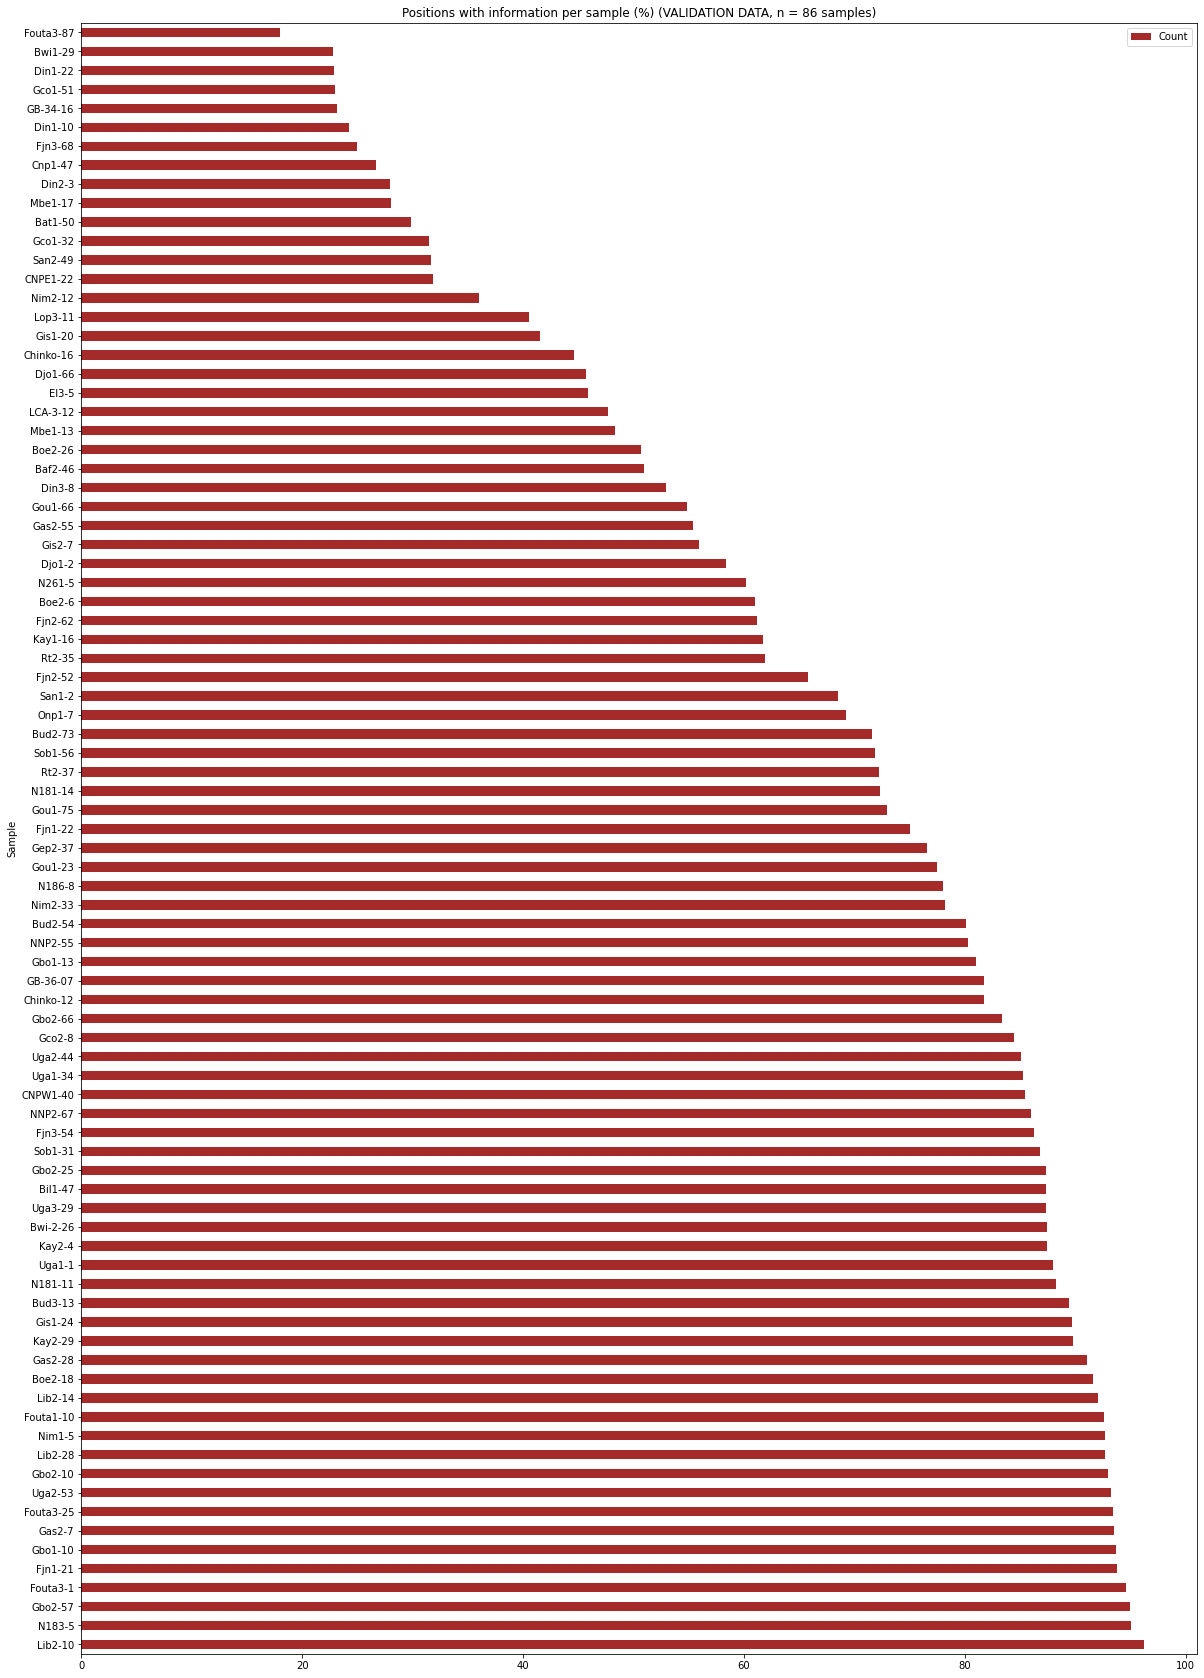

In [110]:
# Plot distribution of informative positions (for which there are no NaNs)
(100*df_val_c.count(axis = 1)/len(df_val_c.columns)).reset_index(name='Count').sort_values(['Count'], ascending=False).plot.barh(figsize=(20,30), 
                                                                                                                  x = "index",
                                                                                                                  title = "Positions with information per sample (%) (VALIDATION DATA, n = 86 samples)",
                                                                                                                  xlabel = "Sample", color = "brown")

In [ ]:
# TRAIN DATASET

In [75]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2690716,2690717,2690718,2690719,2690720,2690721,2690722,2690723,2690724,2690725
Gis1-24,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
N173-14,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Bwi1-74,9,9,9,9,9,9,9,0,0,0,...,0,0,0,0,0,0,2,0,0,0
Tai_R2-30,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0
Sob1-31,9,9,9,9,9,9,9,9,9,9,...,0,0,0,0,0,0,2,0,0,0


In [133]:
df_train_c = df_train.replace(9, np.nan) # Replace 9 by NaN
df_train_c.shape

(348, 2690726)

In [136]:
#df_train_c.to_pickle("./df_train_c.pkl.gz", compression="infer") # Save object with pickle
df_train_c = pd.read_pickle("./df_train_c.pkl.gz", compression="infer") # Save object with pickle

In [137]:
df_train_c.head()

,0,1,2,3,4,5,6,7,8,9,...,2690716,2690717,2690718,2690719,2690720,2690721,2690722,2690723,2690724,2690725
Gis1-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
N173-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bwi1-74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Tai_R2-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Sob1-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Positions with information per sample (%) (TRAIN DATA, n = 348 samples)'}, ylabel='Sample'>

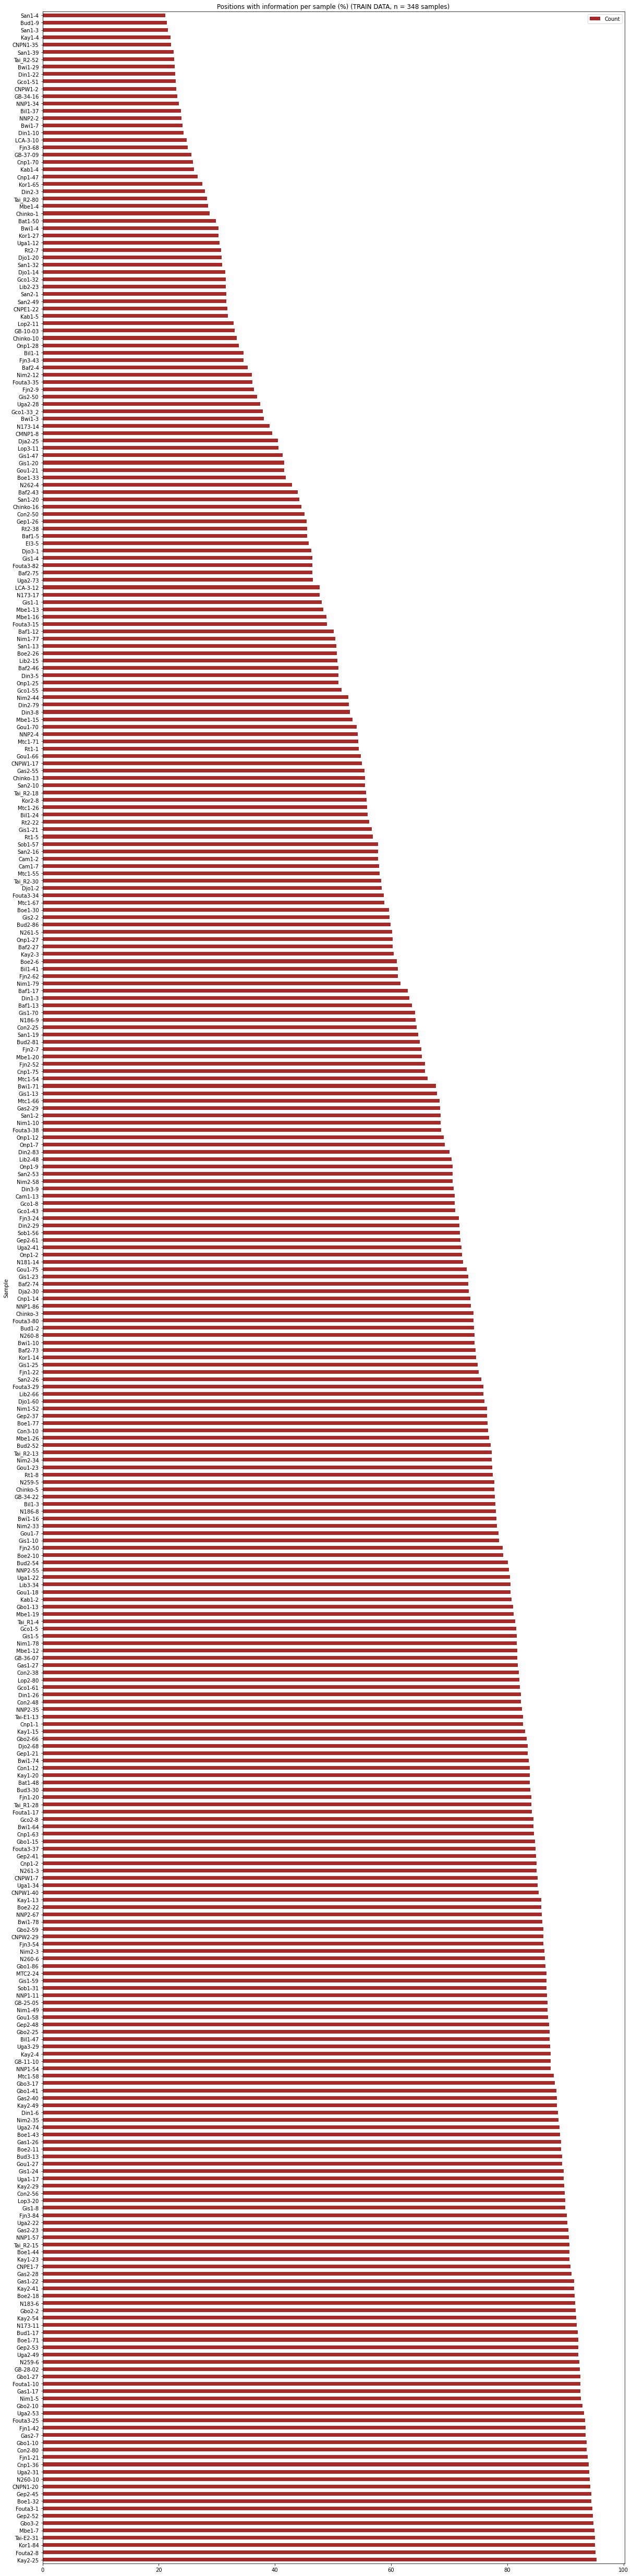

In [128]:
# Plot distribution of informative positions (for which there are no NaNs)
(100*df_train_c.count(axis = 1)/len(df_train_c.columns)).reset_index(name='Count').sort_values(['Count'], ascending=False).plot.barh(figsize=(20,90), 
                                                                                                                  x = "index",
                                                                                                                  title = "Positions with information per sample (%) (TRAIN DATA, n = 348 samples)",
                                                                                                                  xlabel = "Sample", color = "brown")

#### <span style="color:brown">*1.6 Remove samples with many NaNs (threshold of 20%)*</span>

In [165]:
# Remove columns (positions), with more than 80% missingness (no information for 80% individuals)
df_train_c_filtPos80 = df_train_c.dropna(axis = "columns", thresh = int(0.8*len(df_train_c))) 
print(df_train_c_filtPos80.shape)

# Remove rows (samples), with more than 70% missingness (no information in 70% positions)
df_train_c_filtPos80filtSamp70 = df_train_c_filtPos80.dropna(axis = "rows", thresh = int(0.7*len(df_train_c_filtPos80.columns)))
print(df_train_c_filtPos80filtSamp70.shape)

(348, 993247)
(280, 993247)


In [168]:
df_train_c_filtPos80filtSamp70.to_pickle("./pkl/df_train_c_filtPos80filtSamp70.pkl.gz", compression="infer") # Save object with pickle
#df_train_c_filtPos80filtSamp70 = pd.read_pickle("./pkl/df_train_c_filtPos80filtSamp70.pkl.gz", compression="infer") # Save object with pickle

<AxesSubplot:title={'center':'Positions with information per sample (%) (TRAIN DATA, n = 280 samples, m = 993,247 positions)'}, ylabel='Sample'>

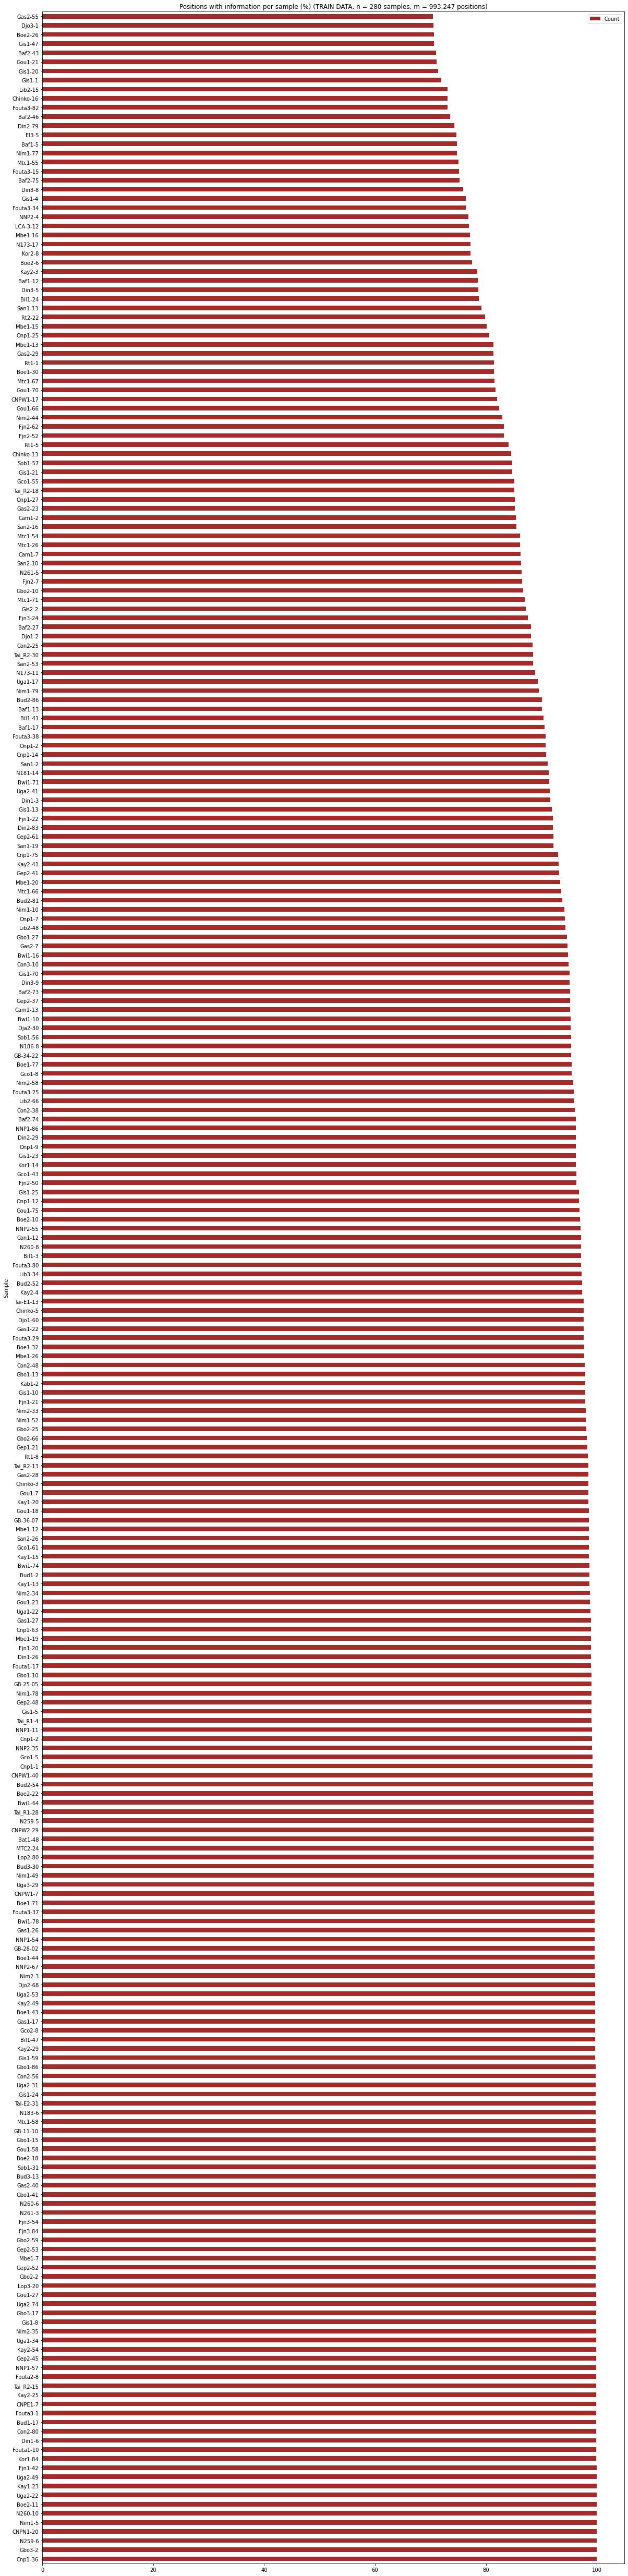

In [167]:
# Plot distribution of informative positions (for which there are no NaNs)
(100*df_train_c_filtPos80filtSamp70.count(axis = 1)/len(df_train_c_filtPos80filtSamp70.columns)).reset_index(name='Count').sort_values(['Count'], ascending=False).plot.barh(figsize=(20,90), 
                                                                                                                  x = "index", 
                                                                                                                  title = "Positions with information per sample (%) (TRAIN DATA, n = 280 samples, m = 993,247 positions)",
                                                                                                                  xlabel = "Sample", color = "brown")

In [164]:
# TEST ALL POSSIBILITIES
# DO NOT NEED TO RUN
# Remove columns (positions), with more than 80% missingness (no information for 80% individuals)
df_train_c_filtPos80 = df_train_c.dropna(axis = "columns", thresh = int(0.8*len(df_train_c))) 
print(df_train_c_filtPos80.shape)

# Remove rows (samples), with more than 50% missingness (no information in 50% positions)
df_train_c_filtPos80filtSamp50 = df_train_c_filtPos80.dropna(axis = "rows", thresh = int(0.5*len(df_train_c_filtPos80.columns)))
print(df_train_c_filtPos80filtSamp50.shape)

# Remove rows (samples), with more than 60% missingness (no information in 60% positions)
df_train_c_filtPos80filtSamp60 = df_train_c_filtPos80.dropna(axis = "rows", thresh = int(0.6*len(df_train_c_filtPos80.columns)))
print(df_train_c_filtPos80filtSamp60.shape)

# Remove rows (samples), with more than 70% missingness (no information in 70% positions)
df_train_c_filtPos80filtSamp70 = df_train_c_filtPos80.dropna(axis = "rows", thresh = int(0.7*len(df_train_c_filtPos80.columns)))
print(df_train_c_filtPos80filtSamp70.shape)

# Remove rows (samples), with more than 80% missingness (no information in 80% positions)
df_train_c_filtPos80filtSamp80 = df_train_c_filtPos80.dropna(axis = "rows", thresh = int(0.8*len(df_train_c_filtPos80.columns)))
print(df_train_c_filtPos80filtSamp80.shape)

(348, 993247)
(309, 993247)
(293, 993247)
(280, 993247)
(246, 993247)
